# Predicting credit card defaults

## Notebook 2 - EDA 
__Exploring the data__

## Table of Contents
1. [**Exploratory Data Analysis**](#a1)<br>
    1.1 [Overview of Data](#a1.1)<br>
    1.2 [Analyse relationship between features](#a1.2)<br>
    1.3 [Summary](#a1.3)

***

In [24]:
#importing libraries we may need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
#load the dataset
credit_df=pd.read_csv(r'C:\Users\Robin\Downloads\capstone_project\_data\credit_df_dataset_cleaned.csv')

***
## Overview of the data

In [26]:
#look at the columns and rows again to remind what were working with
credit_df.head() 

,ID,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,Education_higher,Education_university,Education_highschool,Marriage_Single,Marriage_Other
0,1,20000,1,24,3,3,0,0,-1,-1,...,0,0,0,0,1,0,1,0,0,0
1,2,120000,1,26,0,3,1,1,1,3,...,1000,1000,0,2000,1,0,1,0,1,0
2,3,90000,1,34,1,1,1,1,1,1,...,1000,1000,1000,5000,0,0,1,0,1,0
3,4,50000,1,37,1,1,1,1,1,1,...,1200,1100,1069,1000,0,0,1,0,0,0
4,5,50000,0,57,0,1,0,1,1,1,...,10000,9000,689,679,0,0,1,0,0,0


In [27]:
#check the descriptive stats
credit_df.describe()

,ID,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,Education_higher,Education_university,Education_highschool,Marriage_Single,Marriage_Other
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,0.603733,35.485500,0.983300,0.866233,0.833800,0.779333,0.733800,0.708900,...,5225.68150,4826.076867,4799.387633,5215.502567,0.221200,0.352833,0.467667,0.163900,0.532133,0.012567
std,8660.398374,129747.661567,0.489129,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,...,17606.96147,15666.159744,15278.305679,17777.465775,0.415062,0.477859,0.498962,0.370191,0.498975,0.111396
min,1.000000,10000.000000,0.000000,21.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,390.00000,296.000000,252.500000,117.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,140000.000000,1.000000,34.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1800.00000,1500.000000,1500.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,22500.250000,240000.000000,1.000000,41.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4505.00000,4013.250000,4031.500000,4000.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,30000.000000,1000000.000000,1.000000,79.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,896040.00000,621000.000000,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


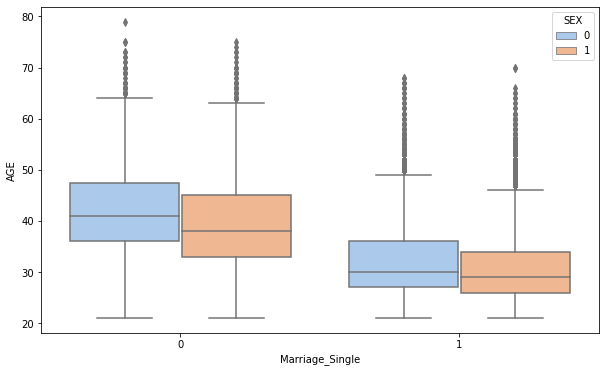

In [73]:
#looking at overall demographs spread in this dataset
plt.figure(figsize=(10,6))
sns.boxplot( x='Marriage_Single', y='AGE',hue='SEX',
                    data=credit_df, palette='pastel')
plt.show()

### Initial observations

- Slightly larger number of female's than male.
- Majority of the people are either married or single
- Average age of the customers is 35 years old.
- Married customers are in thier mid 30's to 40's and single customers are in thier mid 20's to 30's and women are slightly younger in both sets.
- Most of the customers are well educated i.e university undergraduates
- Amount of limit balance varies quite a bit as the standard deviation is quite large.
- In general people do not default on thier payments, however we want to focus on those who do default
***

## Analyse relationship between variables <a id="a1.2"></a>

### Correlation


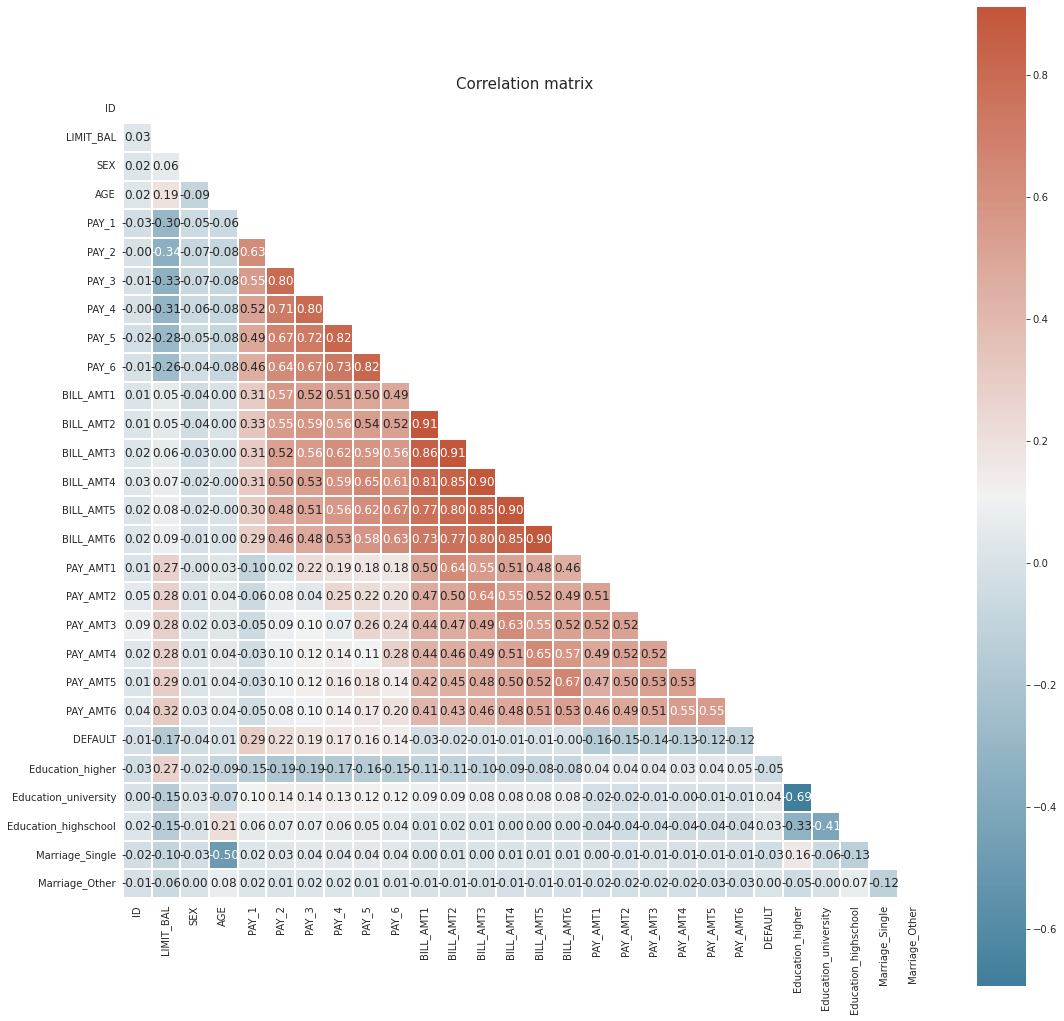

In [28]:
corr = credit_df.corr(method='spearman') 
mask = np.zeros_like(corr,dtype=bool)
mask[np.triu_indices_from(mask)]=True
cmap = sns.diverging_palette(230, 20, as_cmap=True)
with sns.axes_style("white"):
    plt.subplots(figsize=(18, 18))
    sns.heatmap(corr, mask=mask, square=True, linewidths=.3, fmt='.2f', cmap=cmap, annot=True, annot_kws={"size": 12})
plt.title('Correlation matrix', size=15)
plt.show()

#ref - https://seaborn.pydata.org/examples/many_pairwise_correlations.html

The column that we are most interested in is the default column. Notably with the default column, Pay_1 has the highest correlation followed by the rest of the PAY columns. Limit bal is negatively correlated but has second highest correlation coefficient after the PAY columns.

There are also many correlated columns especially the PAY columns are all highly correlated with each other, as are the BILL_AMT and PAY_AMT. It is likely I will have to perform PCA on this dataset to get rid of multicolinearity. However it will not be needed for all of the different types of models e.g. XGBoost or Decision trees.




### Target column - Default
##### Initial expectations

Looking at the target column we know it only has 2 values - default on payment next month- Yes or no. I am contructing a pie chart to see the distribution of the column. I expect the data to be leaning towards more non-defaulters i.e 0 values. As people do tend to pay thier credit card bills on time usually to avoid late fee's encurring or debt which can be exorbitant depending on company policy (unless there is a major economic event like recession).

However it is hard to say what percentage of a split we will see as it could be 60:40, 55:45, 70:30 etc. 

In [29]:
#we will need to refer back to this a few times so assigning it to a variable
target = credit_df['DEFAULT']


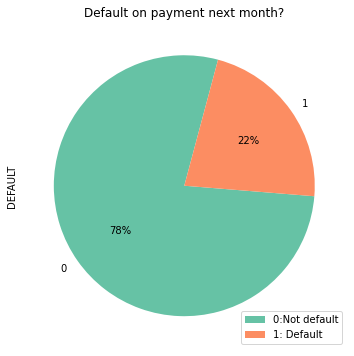

In [30]:
#set the seaborn colour scheme
colours = sns.color_palette('Set2')[0:5]

(credit_df['DEFAULT'].value_counts(normalize=True)*100).plot(kind='pie',autopct='%.0f%%',colors=colours,legend=True, figsize=(14,6),startangle=75)
# plot using value counts and normalise as it shows us the distribution as a percentage of the whole column

plt.legend(['0:Not default','1: Default'],loc='lower right')
plt.title('Default on payment next month?')
plt.show()

As we know from before that this is a very imbalanced dataset. This is normal as most people will have paid thier credit card bill on time to build good credit history and avoid fees. However I will have to do upsampling on the smaller class to avoid bias to the majority class, which can cause the number of false negatives predicted to be higher. 

### Univariate analysis


The ID column is just an identifier, which also has no predictive value this is something we can remove later when modelling.

__Column: LIMIT_BAL__

In [31]:
#colors = sns.color_palette('rocket')
#finding the top values in the column
(credit_df['LIMIT_BAL'].value_counts(normalize=True)*100).head(5)

50000     11.216667
20000      6.586667
30000      5.366667
80000      5.223333
200000     5.093333
Name: LIMIT_BAL, dtype: float64

In [32]:
credit_df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

The most common credit balance limits are 50k, 20k and 30k respectively. Compared to the minimum 10k and maximum of 1000k, the common figures are on the lower end of the range. However the maximum amount is likely to be an outlier as its more than 2 standard deviations away from the mean.

In [33]:
#calculating the point at which it is 2 standard deviations away from the mean
(credit_df['LIMIT_BAL'].mean())+(2*credit_df['LIMIT_BAL'].std())

426979.64580105676

We might need to remove any outliers from this column to avoid getting skewed results. Let's check the distribution of the limit column first.

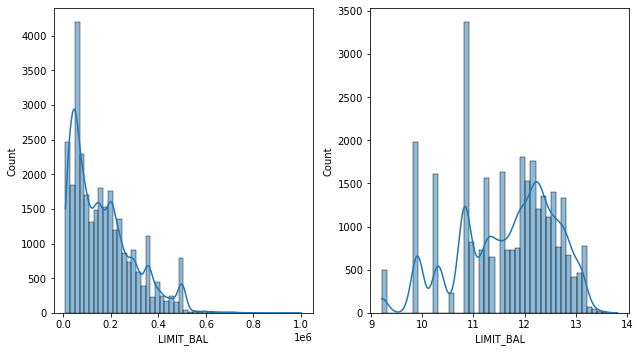

In [34]:
limit_log=np.log(credit_df['LIMIT_BAL']) 
#convert the column into log-scale 
#subplot to compare the difference in distribution
plt.subplots(1, 2, figsize = (9, 5))
  
plt.subplot(1, 2, 1)
sns.histplot(data=credit_df['LIMIT_BAL'],bins=50,kde=True) 

plt.subplot(1, 2, 2)
sns.histplot(limit_log, kde=True)
plt.tight_layout()

plt.show()


The graph on the left shows the initial distribution of the Limit balance column. It seems to have power law distribution where quite skewed with a long right tail and most values frequent near 0. Since the data is not normally distributed this can cause problems for clustering methods we may use as they rely on distances and densities.

On the right is the same feature that has been log transformed. This gives us a more normally distributed graph although not perfect, should help in increasing accuracy of regression and classification models. Some of the other numerical features could also have a similar  power law distribution so we can check if those features might benefit from transformation so they can be more normal.



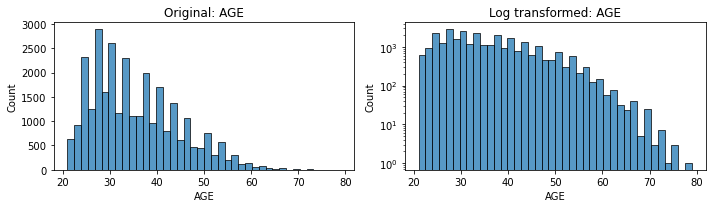

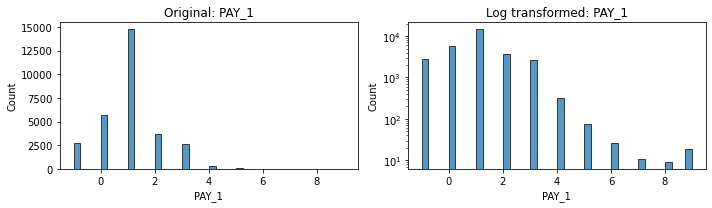

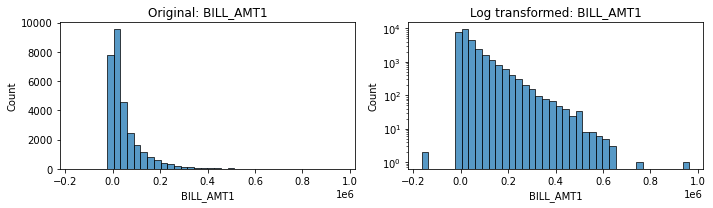

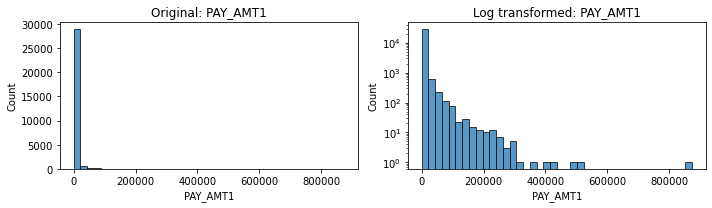

In [35]:
#Other numerical columns we can check
columns = ['AGE','PAY_1','BILL_AMT1','PAY_AMT1']

    
for col in columns:
    plt.subplots(1, 2, figsize = (10, 3))
    plt.tight_layout()
    
    # plot the original features on the left
    plt.subplot(1, 2, 1)
    plt.title(f'Original: {col}')
    sns.histplot(credit_df[col], bins = 40)
    
    # plot the features on a log scale on the right to compare 
    plt.subplot(1, 2, 2)
    plt.title(f'Log transformed: {col}')
    sns.histplot(credit_df[col], bins = 40)
    plt.yscale('log')

    plt.tight_layout()
    plt.show()

Similarly Bill_amount and pay_amount also suffer from the same problem as limit balance. If we transform them we get a slighly more normally distributed feature however it still leans towards more values near 0. It does seem to help the pay column become more balanced as with the distribution of age. However how effective it is will only be dtermined by how much of a difference in accuracy of the model we could possibly get.
***
### Feature analysis against target column

Now we will be doing a bivariate analysis against the other features verses the target column to infer how important they may be to predicting customer defaults as well as how the data is distributed and portion of the values in the columns. Since our target feature is a catergorical column box plots and bar charts are the most suitable for comparison.


In [ ]:

# create a function to compare the categorical columns against default column

def countplot_comparison(feature1,  width):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width, 5))
    s = sns.countplot(ax=ax1, x=target, hue=feature1,
                    data=credit_df, palette='Set2')
    plt.title(f'Default On Payment vs {feature1}')
    plt.show();

__Column: SEX__

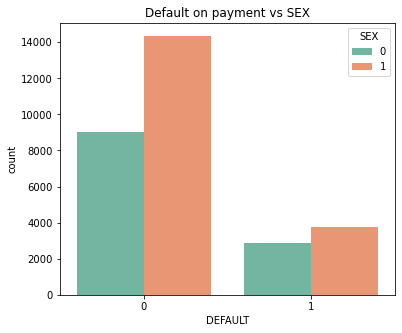

In [107]:
# call the function on sex column first

countplot_comparison('SEX',6)

As you can see from the bar chart the amount and portion of women who pay thier balance on time is significantly higher than the number of men who do. The portion seems to be roughly at a rate of 2:3 of men to women. Whereas for customers who don't pay on time the proportion is much closer together. Additionally as we know from our initial observations is there is slighlty more women included in the dataset. 
From this we can infer that women are more likely to clear thier payments next month and men are slighlty more likely to default on thier payments next month.

__Column: Education history__

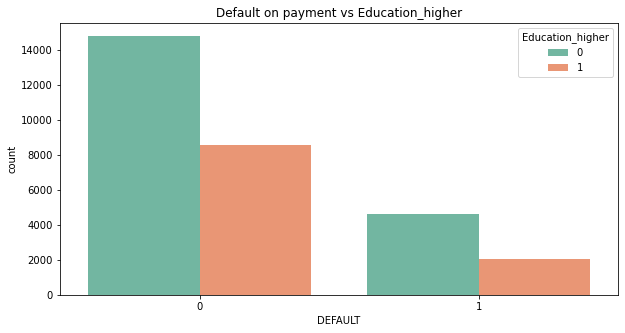

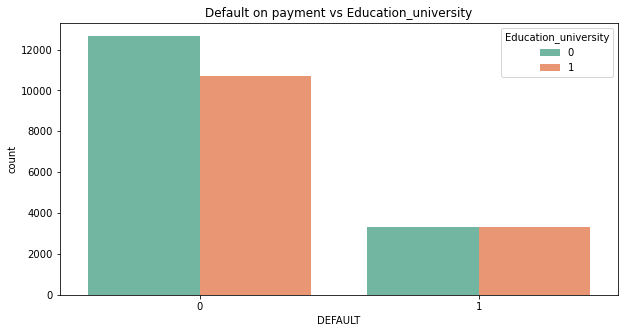

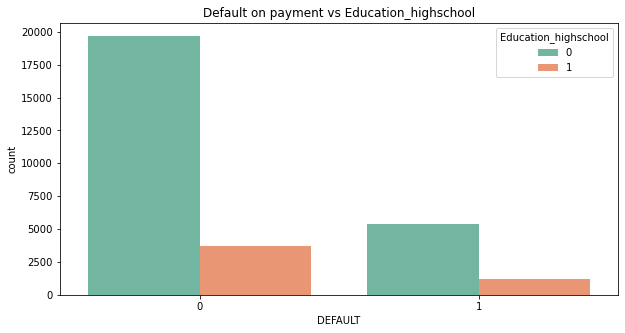

[None, None, None]

In [108]:
#list comprehension to look at distribution for education vs default
[countplot_comparison(x, 10) for x in credit_df.columns if x.startswith('E')]

Looking at these particular columns it is a bit harder to comment on the distribution as there are 3 options so for each feature 1 represents the 1 value but 0 represents 2 other values. We can see that people who have been to graduate school (masters, phd etc) have the smallest proportion of people who default compared to people who don't. It is possible that people who have a higher education are less likely to default however it needs more investigation.

Prportion of defaults in university education and high school is slightly higher compared to higher graduation students. This could be as we know from the background that banks targeted younger students into getting credit cards with initial low interest rates. It's possible many of these people then overspent and now are struggling to pay it off. 

__Column: Marital status__

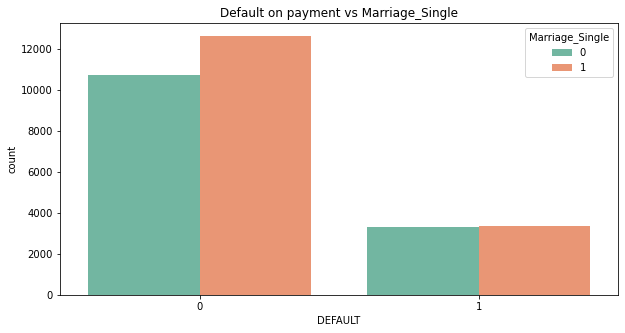

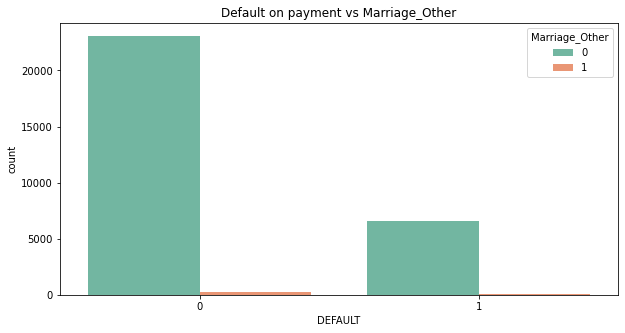

AttributeError: module 'matplotlib.pyplot' has no attribute 'sj'

In [109]:
#list comprehension to look at distribution for marriage vs default

[countplot_comparison(x ,10) for x in credit_df.columns if x.startswith('M')]


Perhaps surprisingly it seems that people who are single are actually less likley to default on their payments. We know from the initial observations that the amount of single and married customers in this dataset is almost equal. Although the number of defaulters are equal for single and married people there is a higher portion of single people who pay on time next month i.e do not default on their payment. 
There is not enough information on people with 'other' marital status.In fact it forms such small part of the overall dataset it is possible to drop it as its impact on the prediction models is likely to be insignificant. 

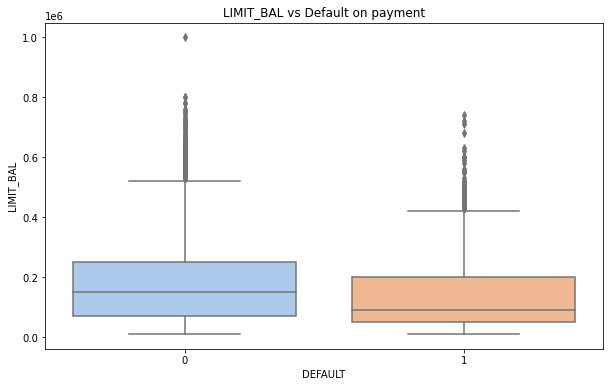

In [104]:
# creating a function to compare the numerical continuous columns against default column

def boxplot_comparison(feature1,  width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width, 6))
    s = sns.boxplot(ax=ax1, x=target, y=feature1,
                    data=credit_df, palette='pastel')
    plt.title(f'{feature1} vs Default On Payment')
    #s.set_xticklabels(s.get_xticklabels(), rotation=90)
    plt.show();

boxplot_comparison('LIMIT_BAL', 10)

The most obvious difference between the two is that customers who are likely to default have a significantly lower limit balance amount. These customers have already been partially identified as higher risk as they already have lower credit limits (in dollers). This column also includes family/supplementary credit suggesting that they have come from lower income backgrounds or thier limit has been based upon credit histories of thier family most probably parents.

__Column: AGE__

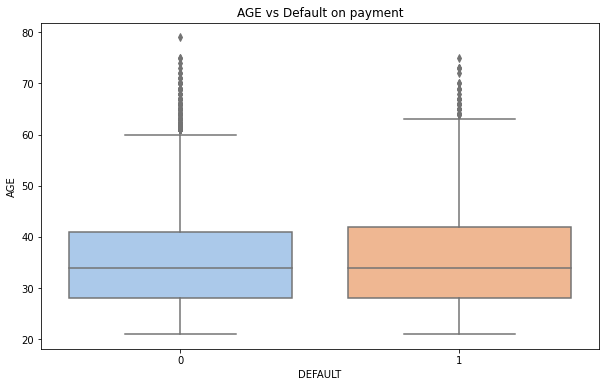

In [105]:
boxplot_comparison('AGE', 10)


There doesn't seem to be a huge differences in age between people who default and don't. The range of values is slightly larger for default which could mean the ages of people who don't pay on time is more spread out, with no set pattern. It is possible that people younger than 60, might be more likley to default as there is fewer outliers in the above 60 years old category compared to non-default which has many of over 60's (likely to be retired customers) who pay on time. However overall there doesn't seem to be much of link between them pureply by looking at the boxplot.

__Column: PAY 1__

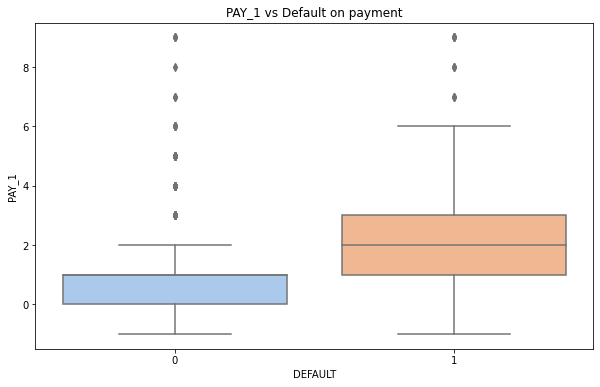

In [106]:
#only taking the first column from each of the finantial data columns - pay1, bill_amt1 and pay_amt1 for brevity
boxplot_comparison('PAY_1', 10)

This is where we really see the difference between defaulters and non-defaulters. 
The non-default column has a very small interquartile range , this is when the middle values are clustered more tightly as well as having close together min and max values. The IQR covers 75% of the data which suggests that the majority of people who don't default on thier payments tend to be late by only 2 months or 3 at the most barring outliers. 

This plot suggests that people who have a higher number of months for thier repayment status column (PAY_1) on average are more likely to default on thier payments. The default values have a higher mediun of about 3, meaning that on average if someone is late on thier payments for 3 months or they will probably default on thier next months payment as well. Since the range of values is slightly larger, though there are few outliers, it does show that most defaulters tend to be late by 2-4 months.

__Column: PAY_AMT1__

In [84]:
# Add a constant to avoid divide by zero = infinity problem when doing log transformation
constant=1000

# from previous analysis we know we need to see this feature transformed so all the values are not affected by power law distribution

pay_amt_log=credit_df['PAY_AMT1']+constant 
pay_amt_log=np.log(pay_amt_log)


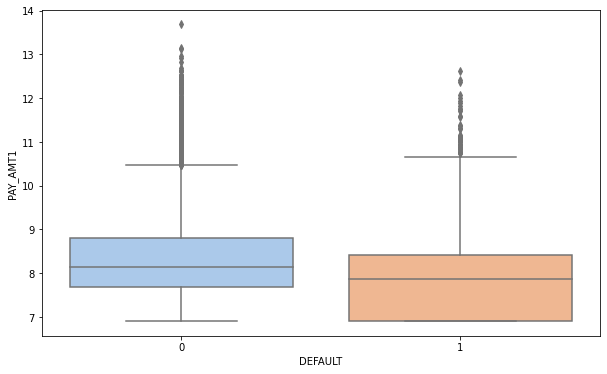

In [85]:
boxplot_comparison(pay_amt_log, 10)

Thanks to transforming the data we can now clearly see that customers who default on thier payments, pay back noticablely less amounts in thier previous months statements than people who don't default. Although the median value is the same, the first quartile is the same as the minimum value and the third quartile is lower value for default. This suggests that customers are  only able to pay back the minimum balance on their credit card debt every month.

__Column: BILL_AMT1__

C:\Users\Robin\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Robin\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


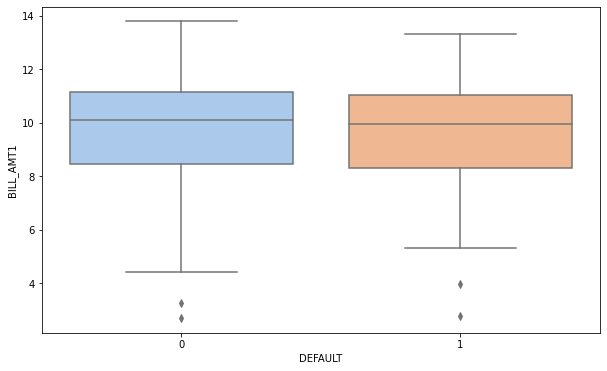

In [94]:
#same as previous feature
billamt_log=credit_df['BILL_AMT1']+constant
billamt_log=np.log(billamt_log)

boxplot_comparison(billamt_log, 10)

There doesn't seem to be a big difference between the 2 for the bill amount column. This is unsurprising as we know from the correlation matrix that there is not much link between the credit bill amount to pay and the probability of the client paying. This does tell us that both sets of customers are spending roughly the same amount of money. However if we compare to the pay_amount column it suggests that one set of customers is spending more than they can afford to and is now struggling to pay back the banks for their expenditure.

***

### Summary of Findings <a id="a1.3"></a>

From the matrix we have found that PAY_1,2, and 3 followed by limit balance columns have the greatest correlation with the default column meaning they should be good indicators of weather someone defaults or not. 
Demographics wise it seems that single women with higher education are the least likely to default on payments. 

People with lower limit balances based both on individuals and family credit as well as if they have higher score on the PAY columns are more likely to default. 
Similarly customers who have a lower previous payment amount but similar bill amounts to their counterparts are more likely to default as they are already struggling to pay back thier credit cards. 
#### Reference
(Ref Brainstation - clustering-code-along-notebook)